## Single SAC simulation example

### Imports

In [1]:
from neuron import h
from RSME_lib.SimParameters import SimulationParameters
from RSME_lib.Simulation import Simulation


### Model initialization

In [2]:
# Parse model specifications from the meta-parameters XML file
simulation_parameters = SimulationParameters(
    "simulation_parameters/single_SAC_meta.xml",
    note = 'single_SAC') 

# Use the model specification to initiate a new simulation
simulation = Simulation(simulation_parameters)

### Model visualization

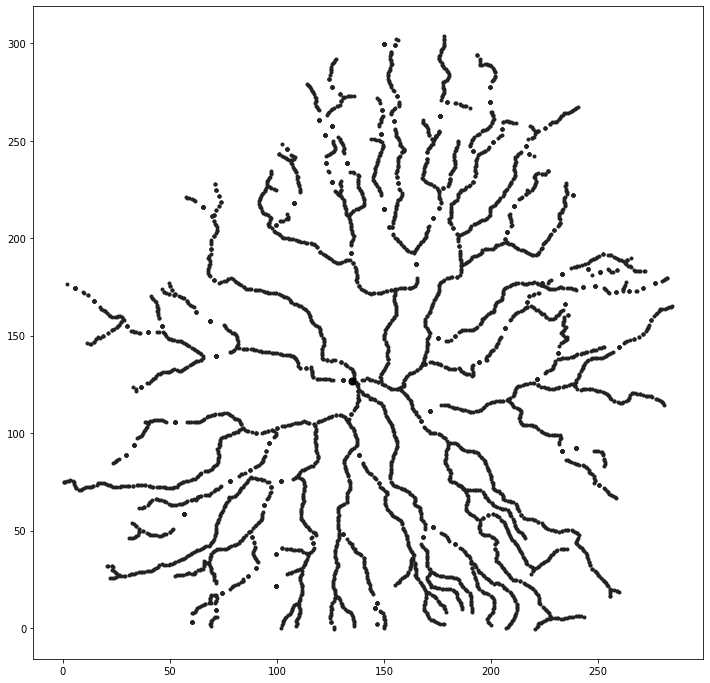

In [3]:
simulation.plot_morphologies()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


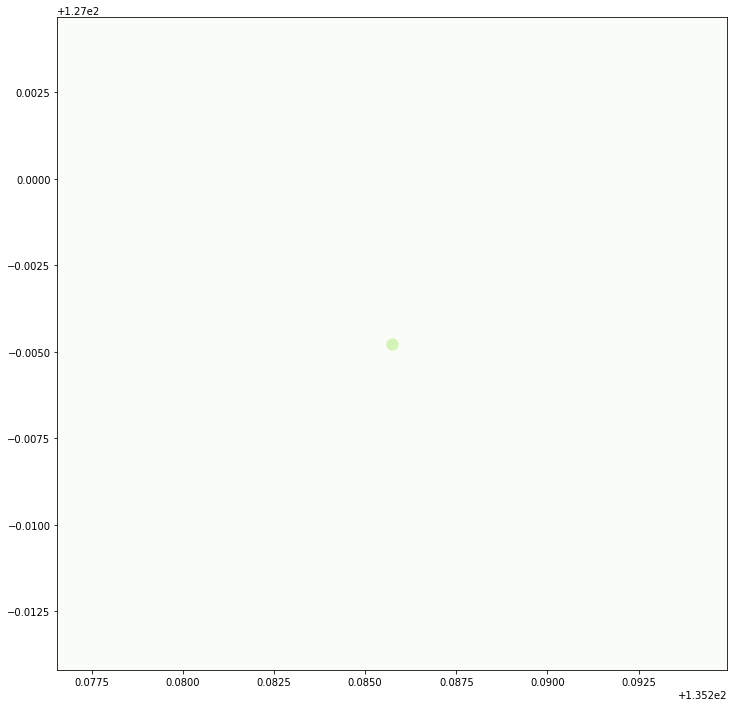

In [4]:
simulation.plot_morphologies(soma_plt = True)

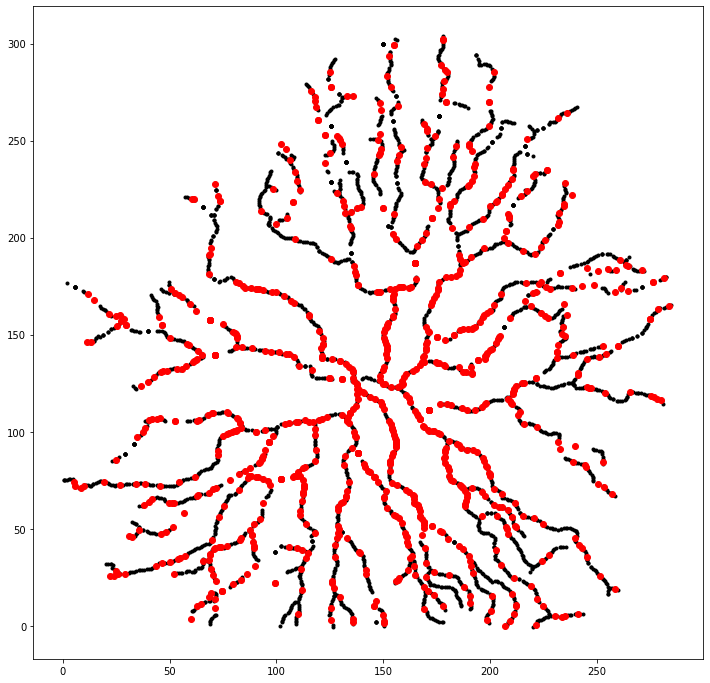

In [5]:
simulation.plot_synapse_distribution()

/Users/elishai/Dropbox/1AFiles/NBEL G2/RSME/RSME_dis/RSME_lib/Functions.py:1163: UserWarning: Attempting to set identical bottom == top == -60.0 results in singular transformations; automatically expanding.
  ax.cax.colorbar(im)


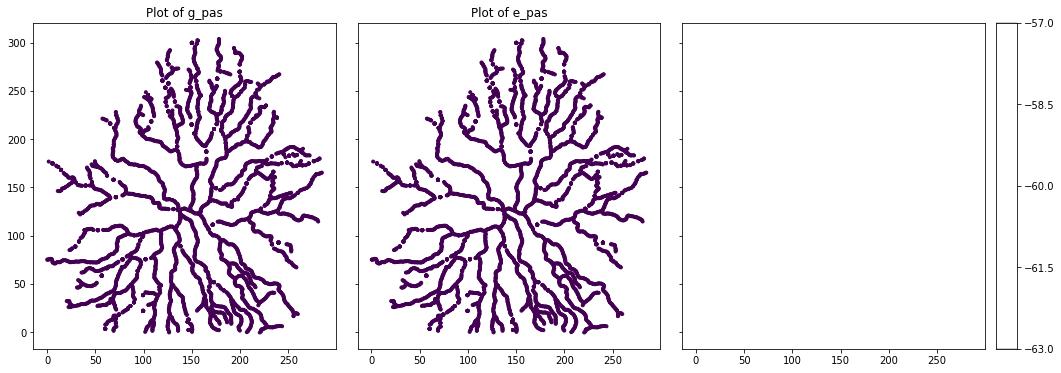

<Figure size 432x288 with 0 Axes>

In [6]:
simulation.plot_channels_distribution()

### Simulate

In [7]:
simulation.simulate()

### Retrieve and Visualize Results
Resulting figures are generated in the corresponding results folder

In [8]:
results = simulation.trace_voltages_at_soma()

<Figure size 432x288 with 0 Axes>

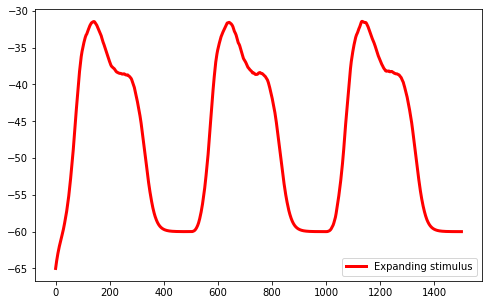

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
plt.plot(results[0]['0'][1]['t'], results[0]['0'][1]['v'], ls='-', c='r', label='Expanding stimulus',linewidth=3)
plt.legend()
plt.show()

In [10]:
simulation.visualize_results()

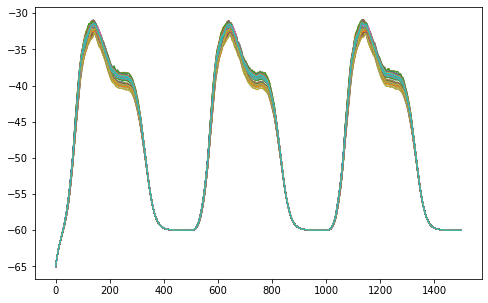

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
results_dend = {}
s = []
for i in range(160):
    results_dend[i] = simulation.trace_voltages_at_dendrite(section_index=i)
    
    s.append(np.sum(np.abs(np.array(results_soma[0]['0'][1]['v']) - np.array(results_dend[i][0]['0'][1]['v']))))
    
    plt.plot(results_dend[i][0]['0'][1]['t'], results_dend[i][0]['0'][1]['v'], label='d {}'.format(i),linewidth=1)
plt.show()
np.argmax(s)

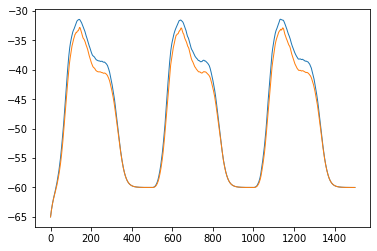

In [29]:
plt.plot(results_soma[0]['0'][1]['t'], results_soma[0]['0'][1]['v'], label='d {}'.format(i),linewidth=1)
plt.plot(results_dend[67][0]['0'][1]['t'], results_dend[67][0]['0'][1]['v'], label='d {}'.format(i),linewidth=1)
plt.show()